# Analysis of Food Prices
By Harshal Patel, Sabrina Almazan, Isis Kazadi, Katie Rink

In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Creating Datasets
- [FAO Food Price Index from the Food and Agriculture Organization of the United States](https://www.fao.org/worldfoodsituation/foodpricesindex/en/) <br><br>
The Dataset for Price Data contains the following information : adm0_id, admo0_name, adm1_id, adm1_name, mkt_id, mkt_name, cm_id, cm_name, cur_id, cur_name, pt_id, pt_name, um_id, um_name, mp_month, mp_year, mp_price.From this data, we will only utilize the Country, name, price, and date of each item. 
The Dataset of Categories contains different types of food under the following categories : Dairy, Meat, Grains, Veggies/Fruits. This allows us to do an analysis based upon our own self decided Categories.

In [3]:
#Read in Data
PriceData = pd.read_csv('../Data/global_food_prices.csv', low_memory=False)
Categories = pd.read_csv('../Data/FoodTypes.csv', low_memory=False)

### Clean Data
In order to assume that the data we analyzed was an accurate sample to be able to draw a conclusion from about all countries. By cross-referencing the CPI-scores with our data on prices, we chose to use Sudan, Mexico, China, Iraq, and Ethiopia, due to their corruption levels being well spread to allow a full range of understanding of corruption’s effect. 

In [4]:
#Combine months and years into Date column
PriceData["date"] = pd.to_datetime(PriceData.mp_year.astype(str) + '/' + PriceData.mp_month.astype(str) + '/01')
#Only include chosen countries
PriceData = PriceData[PriceData['adm0_name'].isin(['Sudan', 'Mexico', 'China', 'Iraq', 'Ethiopia'])]
#Only include Chosen Years
PriceData = PriceData[PriceData["date"].isin(pd.date_range('2013-01-01','2021-01-01'))]

#Drop unused columns
PriceData = PriceData.drop('mp_year', 1)
PriceData = PriceData.drop('mp_month', 1)
PriceData = PriceData.drop('adm1_id', 1)
PriceData = PriceData.drop('adm1_name', 1)
PriceData = PriceData.drop('mkt_id', 1)
PriceData = PriceData.drop('mkt_name', 1)
PriceData = PriceData.drop('cur_id', 1)
PriceData = PriceData.drop('cur_name', 1)
PriceData = PriceData.drop('pt_id', 1)
PriceData = PriceData.drop('pt_name', 1)
PriceData = PriceData.drop('um_id', 1)
PriceData = PriceData.drop('um_name', 1)
PriceData = PriceData.drop('mp_commoditysource', 1)

#Put all values to lower case
PriceData = PriceData.applymap(lambda s: s.lower() if type(s) == str else s)
Categories = Categories.applymap(lambda s: s.lower() if type(s) == str else s)

#Shorten the names of the cm_name
PriceData['cm_name'] = PriceData['cm_name'].str.split(' -').str.get(0)
PriceData['cm_name'] = PriceData['cm_name'].str.split(' \(').str.get(0)
#Shorten all names in food types list
Categories['Fruits/Vegetables'] = Categories['Fruits/Vegetables'].str.split(' \(').str.get(0)
Categories['Dairy'] = Categories['Dairy'].str.split(' \(').str.get(0)
Categories['Grains'] = Categories['Grains'].str.split(' \(').str.get(0)
Categories['Meat'] = Categories['Meat'].str.split(' \(').str.get(0)

/tmp/ipykernel_30840/1058878590.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  PriceData = PriceData.drop('mp_year', 1)
/tmp/ipykernel_30840/1058878590.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  PriceData = PriceData.drop('mp_month', 1)
/tmp/ipykernel_30840/1058878590.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  PriceData = PriceData.drop('adm1_id', 1)
/tmp/ipykernel_30840/1058878590.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  PriceData = PriceData.drop('adm1_name', 1)
/tmp/ipykernel_30840/1058878590.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'l

### Overall Analysis

In [5]:
#Datasets based on Food Categories
DairyData = PriceData[PriceData['cm_name'].isin(Categories['Dairy'])] #Dairy Dataset
MeatData = PriceData[PriceData['cm_name'].isin(Categories['Meat'])] #Meat Dataset
GrainsData = PriceData[PriceData['cm_name'].isin(Categories['Grains'])] #Grains Dataset
VegData = PriceData[PriceData['cm_name'].isin(Categories['Fruits/Vegetables'])] #Vegtable/Fruits Dataset

In [6]:
#Datasets based on Country
SudanData = PriceData[PriceData['adm0_name'].isin(['sudan'])]
MexicoData = PriceData[PriceData['adm0_name'].isin(['mexico'])]
ChinaData = PriceData[PriceData['adm0_name'].isin(['china'])]
IraqData = PriceData[PriceData['adm0_name'].isin(['iraq'])]
EthiopiaData = PriceData[PriceData['adm0_name'].isin(['ethiopia'])]

### Prices Over Time
Due to our limited data, we did not have prices for several of the categories prior to 2017. And we can generally see that products with similar origins, such as vegetables and grains, both of which are crops that rely on weather conditions to grow, follow similar patterns of rise and fall in prices. This correlation is mostly likely caused by similarities in manufacturing costs, thus causing similar fluctuations in prices to maintain a profit. While Meat and Dairy initially followed similar patterns, in the later half of the graph they seem to have an inverse correlation in prices, whereas one tends to increase, the other decreases. The major change for both Meat and Dairy prices occurred around 2020, when COVID first hit. As the pandemic did cause a decline in global meat demand, the prices would generally increase as a direct result of the demand decreasing. Alternatively, as people stocked up for the upcoming pandemic, Dairy products became very highly in demand, thus the price was able to decrease. All prices, however, proceeded to increase from the initial change spike in prices due to the increased scarcity of items resulting from the pandemic. 


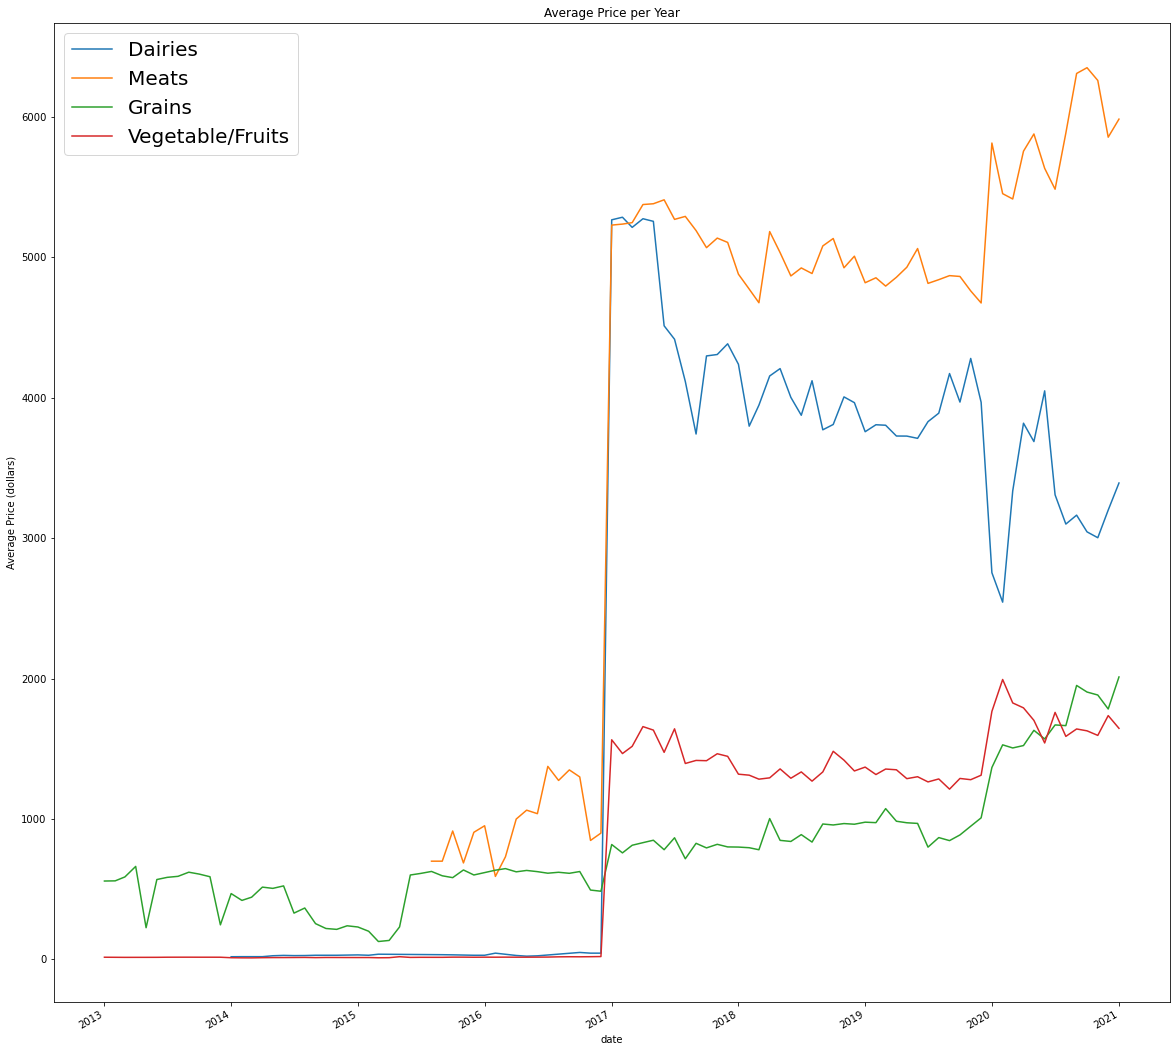

In [7]:
#Find average price of each category at each given date
DairyData =  DairyData.groupby('date', as_index=False)['mp_price'].mean()
MeatData = MeatData.groupby('date', as_index=False)['mp_price'].mean()
GrainsData = GrainsData.groupby('date', as_index=False)['mp_price'].mean()
VegData = VegData.groupby('date', as_index=False)['mp_price'].mean()

#Plot Prices over years based on category
ax = DairyData.plot(x='date', y='mp_price')
ax = MeatData.plot(ax=ax, x='date', y='mp_price')
ax = GrainsData.plot(ax=ax, x='date', y='mp_price')
ax.set_xlabel("Year")
ax.set_ylabel("Average Price (dollars)")
VegData.plot(ax=ax, x='date', y='mp_price', figsize=(20,20), title='Average Price per Year')
ax.legend(["Dairies", "Meats", "Grains", "Vegetable/Fruits"], prop={'size': 20});

As we can see in the graph above, the prices generally increase as the years increase, which makes sense in regard to inflation. Prices all saw a general increase around 2020 when hit, due to the pandemic. However, as can be seen by the sharp increase in Iraq and Sudan prices, those were the two countries hit the hardest by COVID. Whereas, Iraq was not quite as affected by COVID, as the trends remained consistent due to it already suffering from food shortages due to the Iraq war, which ended around 2017.  Due to the low average prices of our data from China and Mexico, and the lack of variable data, the lines appear flat when graphed, which makes analysis on said countries incredibly difficult on a large scale. 


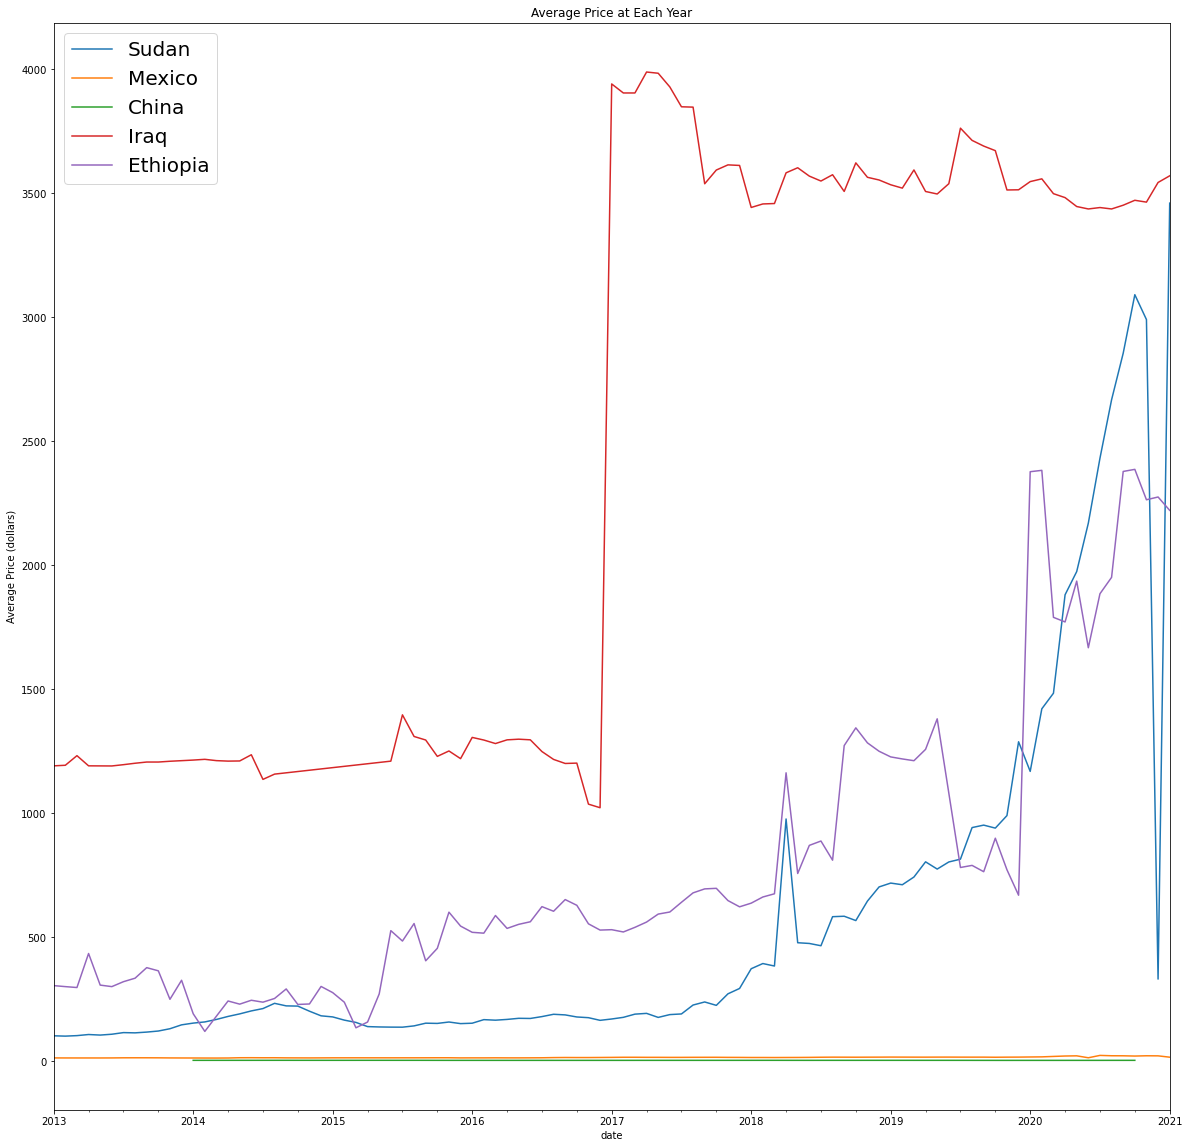

In [8]:
#Find average price of each Country at each given date
#Find average price of each category at each given date
SudanData =  SudanData.groupby('date', as_index=False)['mp_price'].mean()
MexicoData = MexicoData.groupby('date', as_index=False)['mp_price'].mean()
ChinaData = ChinaData.groupby('date', as_index=False)['mp_price'].mean()
IraqData = IraqData.groupby('date', as_index=False)['mp_price'].mean()
EthiopiaData = EthiopiaData.groupby('date', as_index=False)['mp_price'].mean()

ax = SudanData.plot(x='date', y='mp_price')
ax = MexicoData.plot(ax=ax, x='date', y='mp_price')
ax = ChinaData.plot(ax=ax, x='date', y='mp_price')
ax = IraqData.plot(ax=ax, x='date', y='mp_price')
ax.set_xlabel("Year")
ax.set_ylabel("Average Price (dollars)")
EthiopiaData.plot.line(ax=ax, x='date', y='mp_price',  figsize=(20,20), title="Average Price at Each Year")
ax.legend(["Sudan", "Mexico", "China", "Iraq", "Ethiopia"], prop={'size': 20});

## Categorical Analysis
We broke the data up into the category each food item fell under, Grains, Meat, Dairy, and Vegtables/Frutis, by deriving it from the unique values of the dataset and finding that all but the wage data points fit under one of these broad categories. Additionally, all of these categories are found at the basis of the necessary food groups for human survival.

### Dairy Analysis

The dairy products have been selected via an online list from https://www.listchallenges.com/. Each food item included the name, price, country of origin, and the date of said price. All of the data was converted to lowercase and any detailed post-fixes were removed to allow smoother merging for analysis sake

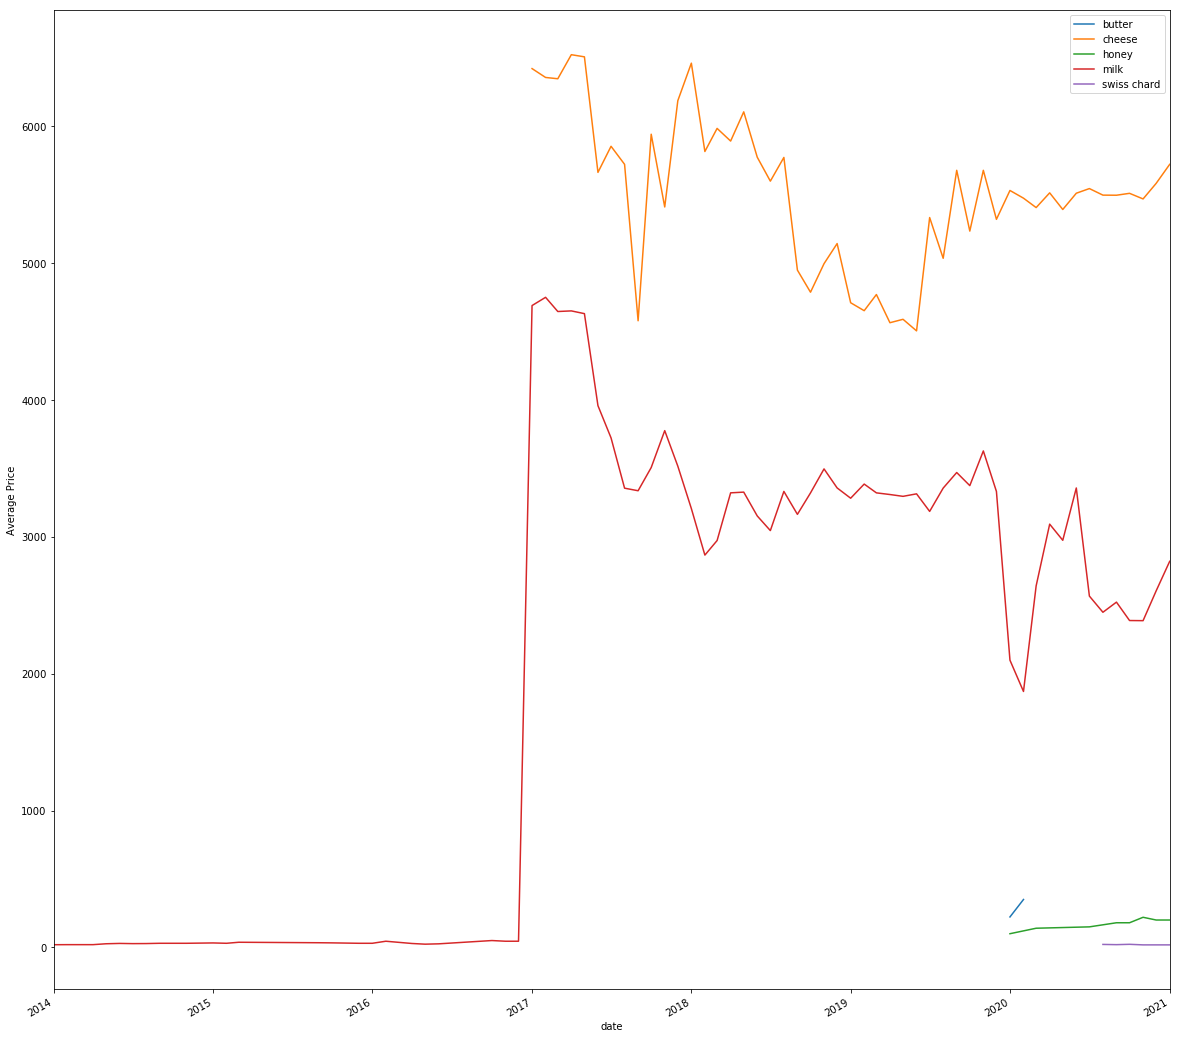

In [9]:
#Price average at each date for every item
#Combine all the items at each year to find average price
DairyProductGroups = PriceData[PriceData['cm_name'].isin(Categories['Dairy'])] #Dairy Dataset
DairyProductGroups = DairyProductGroups.groupby(['cm_name', 'date'], as_index=False)['mp_price'].mean()
fig, ax = plt.subplots()
ax.set_xlabel("Year")
ax.set_ylabel("Average Price")
for key, grp in DairyProductGroups.groupby(['cm_name']):
    ax = grp.plot(ax=ax, kind='line', x='date', y='mp_price', label=key, figsize=(20,20))
plt.legend(loc='best')
plt.show()

In [24]:
pivotedDairyData = DairyProductGroups.pivot_table('mp_price', 'date', 'cm_name')

#Find correlation between prices
headers=list(['butter','cheese','honey','milk','swiss chard'[]

pivotedDairyData[headers].corr()

cm_name,butter,cheese,honey,milk,swiss chard
cm_name,,,,,
butter,1.0,-1.000000,NaN,-1.000000,NaN
cheese,-1.0,1.000000,0.279363,0.376116,-0.455005
honey,NaN,0.279363,1.000000,0.487343,-0.763763
milk,-1.0,0.376116,0.487343,1.000000,-0.560743
swiss chard,NaN,-0.455005,-0.763763,-0.560743,1.000000


### Grains Analysis

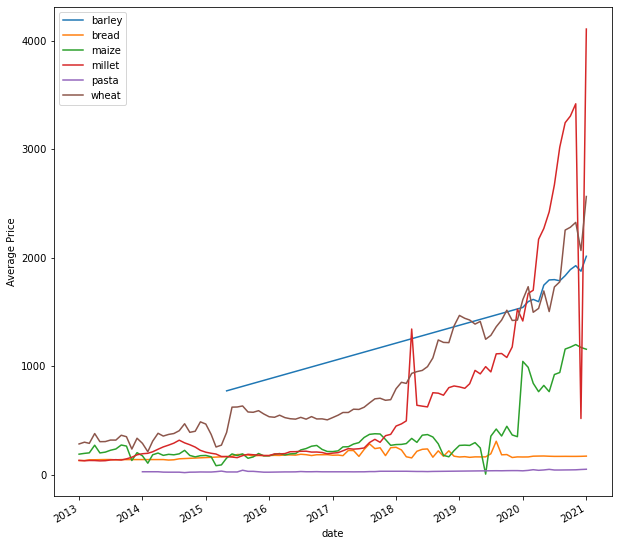

In [16]:
#Price average at each date for every item
#Combine all the items at each year to find average price
GrainsProductGroups = PriceData[PriceData['cm_name'].isin(['barley','bread','maize','wheat','millet','pasta'])]#Grains Dataset
GrainsProductGroups = GrainsProductGroups.groupby(['cm_name', 'date'], as_index=False)['mp_price'].mean()
fig, ax = plt.subplots()
ax.set_xlabel("Year")
ax.set_ylabel("Average Price")
for key, grp in GrainsProductGroups.groupby(['cm_name']):
    ax = grp.plot(ax=ax, kind='line', x='date', y='mp_price', label=key, figsize=(10,10))
plt.legend(loc='best')
plt.show()

### Meat Analysis

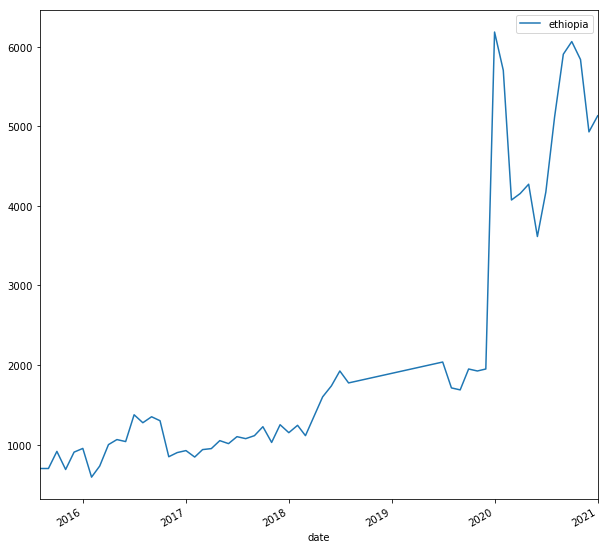

In [41]:
#Ethiopia Meat Data 
MeatData = PriceData[PriceData['cm_name'].isin(Categories['Meat'])] #Meat Dataset
EthiopiaMeatData = MeatData[MeatData['adm0_name'].isin(['ethiopia'])]
EthiopiaMeatData = EthiopiaMeatData.groupby(['adm0_name', 'date'], as_index=False)['mp_price'].mean()
fig, ax = plt.subplots()
for key, grp in EthiopiaMeatData.groupby(['adm0_name']):
    ax = grp.plot(ax=ax, kind='line', x='date', y='mp_price', label=key, figsize=(10,10))
plt.show()

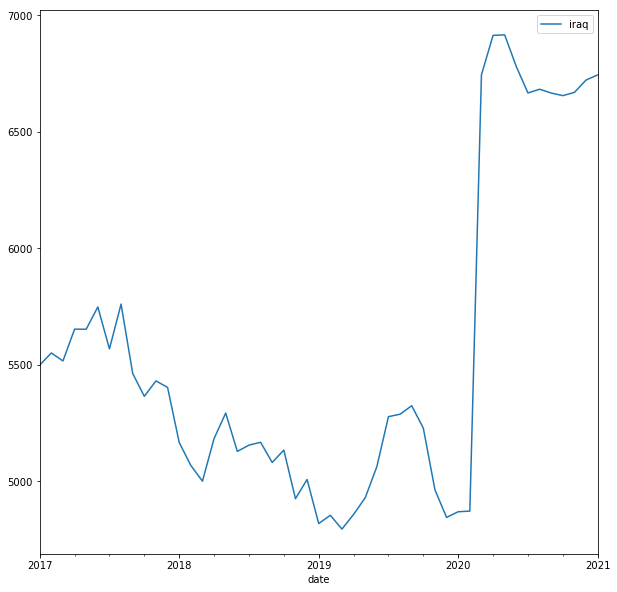

In [42]:
#Iraq Meat Data 
MeatData = PriceData[PriceData['cm_name'].isin(Categories['Meat'])] #Meat Dataset
IraqMeatData = MeatData[MeatData['adm0_name'].isin(['iraq'])]
IraqMeatData = IraqMeatData.groupby(['adm0_name', 'date'], as_index=False)['mp_price'].mean()
fig, ax = plt.subplots()
for key, grp in IraqMeatData.groupby(['adm0_name']):
    ax = grp.plot(ax=ax, kind='line', x='date', y='mp_price', label=key, figsize=(10,10))
plt.show()

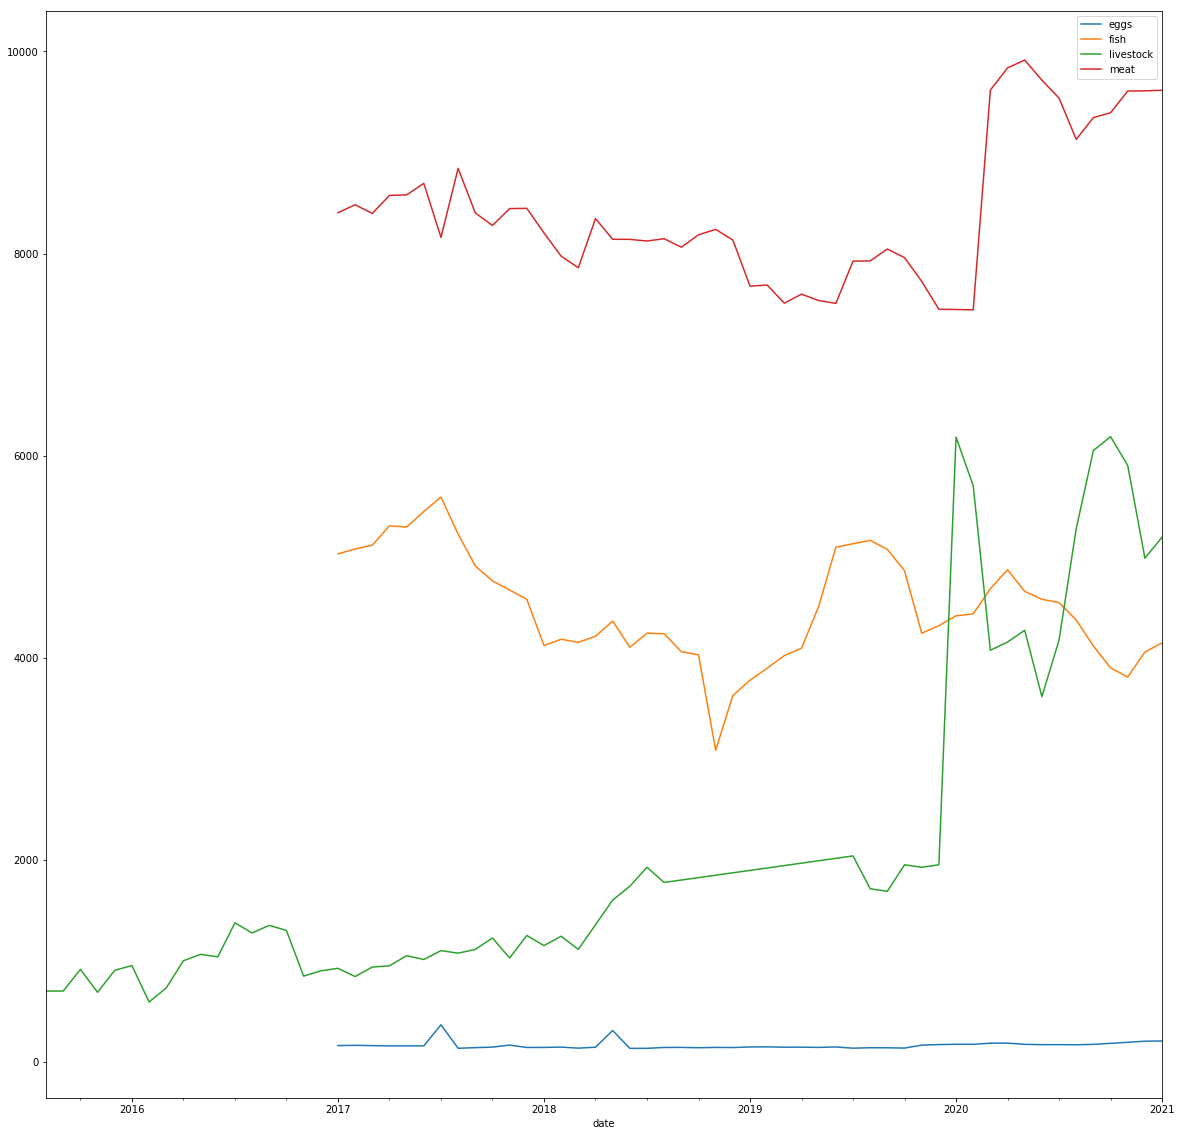

In [27]:
MeatProductGroups = PriceData[PriceData['cm_name'].isin(Categories['Meat'])] #Meat Dataset
MeatProductGroups = MeatProductGroups.groupby(['cm_name', 'date'], as_index=False)['mp_price'].mean()
fig, ax = plt.subplots()
for key, grp in MeatProductGroups.groupby(['cm_name']):
    ax = grp.plot(ax=ax, kind='line', x='date', y='mp_price', label=key, figsize=(20,20))
plt.legend(loc='best')
plt.show()

### Vegetables and Fruits Analysis